<a href="https://colab.research.google.com/github/JChengecha/titanic_and_spam_datasets_projects/blob/main/Naive_Bayes_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # The Research Question





Spam email is unsolicited and unwanted junk email sent out in bulk to an indiscriminate recipient list. Typically, spam is sent for commercial purposes.
the objective here is to identify whether an email is spam or not

### The Metric for Success

To come up with an optimized model that best classifies the emails
 

###  The Experimental Design

A dataset of labeled email messages is provided. We will apply classification techniques, more specifically the Naive Bayes classification model.

Will later test the model for accuracy and performance on unclassified email messages.

Dataset Source: [Link](https://archive.ics.uci.edu/ml/datasets/Spambase)

# Reading & Checking the Dataset

importing some libraries

In [4]:
import pandas as pd
import numpy as np

reading the data and previewing

In [5]:
df=pd.read_csv('/content/spambase.csv',)

In [6]:
df.head()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


Retrieving the column names 

In [7]:
columns=['word_freq_make:         continuous.','word_freq_address:      continuous.','word_freq_all:          continuous.',
         'word_freq_3d:           continuous.','word_freq_our:          continuous.','word_freq_over:         continuous.',
         'word_freq_remove:       continuous.','word_freq_internet:     continuous.','word_freq_order:        continuous.',
         'word_freq_mail:         continuous.','word_freq_receive:      continuous.','word_freq_will:         continuous.',
         'word_freq_people:       continuous.','word_freq_report:       continuous.','word_freq_addresses:    continuous.',
         'word_freq_free:         continuous.','word_freq_business:     continuous.','word_freq_email:        continuous.',
         'word_freq_you:          continuous.','word_freq_credit:       continuous.','word_freq_your:         continuous.',
         'word_freq_font:         continuous.','word_freq_000:          continuous.','word_freq_money:        continuous.',
         'word_freq_hp:           continuous.','word_freq_hpl:          continuous.','word_freq_george:       continuous.',
         'word_freq_650:          continuous.','word_freq_lab:          continuous.','word_freq_labs:         continuous.',
         'word_freq_telnet:       continuous.','word_freq_857:          continuous.','word_freq_data:         continuous.',
         'word_freq_415:          continuous.','word_freq_85:           continuous.','word_freq_technology:   continuous.',
         'word_freq_1999:         continuous.','word_freq_parts:        continuous.','word_freq_pm:           continuous.',
         'word_freq_direct:       continuous.','word_freq_cs:           continuous.','word_freq_meeting:      continuous.',
         'word_freq_original:     continuous.','word_freq_project:      continuous.','word_freq_re:           continuous.',
         'word_freq_edu:          continuous.','word_freq_table:        continuous.','word_freq_conference:   continuous.',
         'char_freq_;:            continuous.','char_freq_(:            continuous.','char_freq_[:            continuous.',
         'char_freq_!:            continuous.','char_freq_$:            continuous.','char_freq_#:            continuous.',
         'capital_run_length_average: continuous.','capital_run_length_longest: continuous.','capital_run_length_total:   continuous.','spam']

In [8]:
# checking the procedure on how to extract the column name from the list
columns[0].split(':')[0]

'word_freq_make'

In [9]:
# using a For Loop to iterate through list usingthe above code
column_names=[]
for i in columns: 
    column_names.append(i.split(':')[0]) 

column_names

['word_freq_make',
 'word_freq_address',
 'word_freq_all',
 'word_freq_3d',
 'word_freq_our',
 'word_freq_over',
 'word_freq_remove',
 'word_freq_internet',
 'word_freq_order',
 'word_freq_mail',
 'word_freq_receive',
 'word_freq_will',
 'word_freq_people',
 'word_freq_report',
 'word_freq_addresses',
 'word_freq_free',
 'word_freq_business',
 'word_freq_email',
 'word_freq_you',
 'word_freq_credit',
 'word_freq_your',
 'word_freq_font',
 'word_freq_000',
 'word_freq_money',
 'word_freq_hp',
 'word_freq_hpl',
 'word_freq_george',
 'word_freq_650',
 'word_freq_lab',
 'word_freq_labs',
 'word_freq_telnet',
 'word_freq_857',
 'word_freq_data',
 'word_freq_415',
 'word_freq_85',
 'word_freq_technology',
 'word_freq_1999',
 'word_freq_parts',
 'word_freq_pm',
 'word_freq_direct',
 'word_freq_cs',
 'word_freq_meeting',
 'word_freq_original',
 'word_freq_project',
 'word_freq_re',
 'word_freq_edu',
 'word_freq_table',
 'word_freq_conference',
 'char_freq_;',
 'char_freq_(',
 'char_freq_[',
 '

Reading the data, this time assigning the column names

In [10]:
df=pd.read_csv('/content/spambase.csv',names=column_names)

######previewing the dataset once more

In [11]:
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [12]:
df.tail()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
4596,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,0.0,1.88,0.00,0.0,0.0,0.0,0.0,0.0,0.62,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4597,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,6.00,0.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4598,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.80,0.30,0.0,0.0,0.0,0.0,0.9,1.50,0.0,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4599,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,1.93,0.0,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4600,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.65,0.0,0.0,0.0,0.0,0.0,4.60,0.0,0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.97,0.65,0.0,0.0,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

# Data Cleaning

######checking for null values

In [14]:
df.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

######checking duplicates and removing them

In [15]:
#checking for duplicates
df.duplicated().sum()

391

In [16]:
#dropping the duplicates
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

######Checking for Outliers
Boxplots have always been one of the best ways to visualise outliers.Here, rather than plotting all 50+ boxplots will be checking the percentage of points that do not lie between the 25th quantile and 75th quantile,

In [17]:
# Percentage outliers

for k, v in df.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  iqr = q3 - q1

  v_col = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]

  perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
  print("Column %s outliers = %.2f%%" % (k, perc))

Column word_freq_make outliers = 100.00%
Column word_freq_address outliers = 100.00%
Column word_freq_all outliers = 7.05%
Column word_freq_3d outliers = 100.00%
Column word_freq_our outliers = 10.67%
Column word_freq_over outliers = 100.00%
Column word_freq_remove outliers = 100.00%
Column word_freq_internet outliers = 100.00%
Column word_freq_order outliers = 100.00%
Column word_freq_mail outliers = 17.77%
Column word_freq_receive outliers = 100.00%
Column word_freq_will outliers = 5.94%
Column word_freq_people outliers = 100.00%
Column word_freq_report outliers = 100.00%
Column word_freq_addresses outliers = 100.00%
Column word_freq_free outliers = 19.71%
Column word_freq_business outliers = 100.00%
Column word_freq_email outliers = 100.00%
Column word_freq_you outliers = 1.38%
Column word_freq_credit outliers = 100.00%
Column word_freq_your outliers = 4.61%
Column word_freq_font outliers = 100.00%
Column word_freq_000 outliers = 100.00%
Column word_freq_money outliers = 100.00%
Col

#  Exploratory Analysis

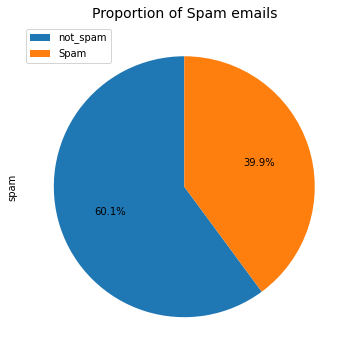

In [21]:
#Pie chart of the above just for a quick proportion view
import matplotlib.pyplot as plt


df.groupby(['spam'])['spam'].count().plot(kind='pie',labels=None,startangle=90,figsize=(15,6),autopct='%1.1f%%')
plt.legend(labels=['not_spam','Spam'])
plt.title('Proportion of Spam emails',fontsize=14)
plt.show()

In [20]:
# Ploting the univariate summaries and recording our observations
def univariate_statistics(df):
  out_df = pd.DataFrame(columns=['Count', 'Nulls', 'Unique', 'Mode', 'Mean', 'Min','25%', 'Median', '75%', 'Max', 'Std_dev'])
# looping the through the dataset
  for col in df:
    if pd.api.types.is_numeric_dtype(df[col]):
      out_df.loc[col] = [df[col].count(), df[col].isnull().sum(), df[col].nunique(), df[col].mode().values[0], df[col].mean(), df[col].min(), 
                         df[col].quantile(0.25), df[col].median(), df[col].quantile(0.75), df[col].max(), df[col].std()]
    else:
     out_df.loc[col] = [df[col].count(), df[col].isnull().sum(), df[col].nunique(),df[col].mode().values[0],'-', '-', '-', '-', '-', '-', '-']

  return out_df

univariate_statistics(df)

,Count,Nulls,Unique,Mode,Mean,Min,25%,Median,75%,Max,Std_dev
word_freq_make,4210.0,0.0,142.0,0.0,0.104366,0.0,0.0000,0.000,0.00000,4.540,0.300005
word_freq_address,4210.0,0.0,171.0,0.0,0.112656,0.0,0.0000,0.000,0.00000,14.280,0.454260
word_freq_all,4210.0,0.0,214.0,0.0,0.291473,0.0,0.0000,0.000,0.44000,5.100,0.515719
word_freq_3d,4210.0,0.0,43.0,0.0,0.063078,0.0,0.0000,0.000,0.00000,42.810,1.352487
word_freq_our,4210.0,0.0,255.0,0.0,0.325321,0.0,0.0000,0.000,0.41000,10.000,0.687805
word_freq_over,4210.0,0.0,141.0,0.0,0.096656,0.0,0.0000,0.000,0.00000,5.880,0.276030
word_freq_remove,4210.0,0.0,173.0,0.0,0.117475,0.0,0.0000,0.000,0.00000,7.270,0.397284
word_freq_internet,4210.0,0.0,170.0,0.0,0.108000,0.0,0.0000,0.000,0.00000,11.110,0.410282
word_freq_order,4210.0,0.0,144.0,0.0,0.091860,0.0,0.0000,0.000,0.00000,5.260,0.282144
word_freq_mail,4210.0,0.0,245.0,0.0,0.248420,0.0,0.0000,0.000,0.19000,18.180,0.656638


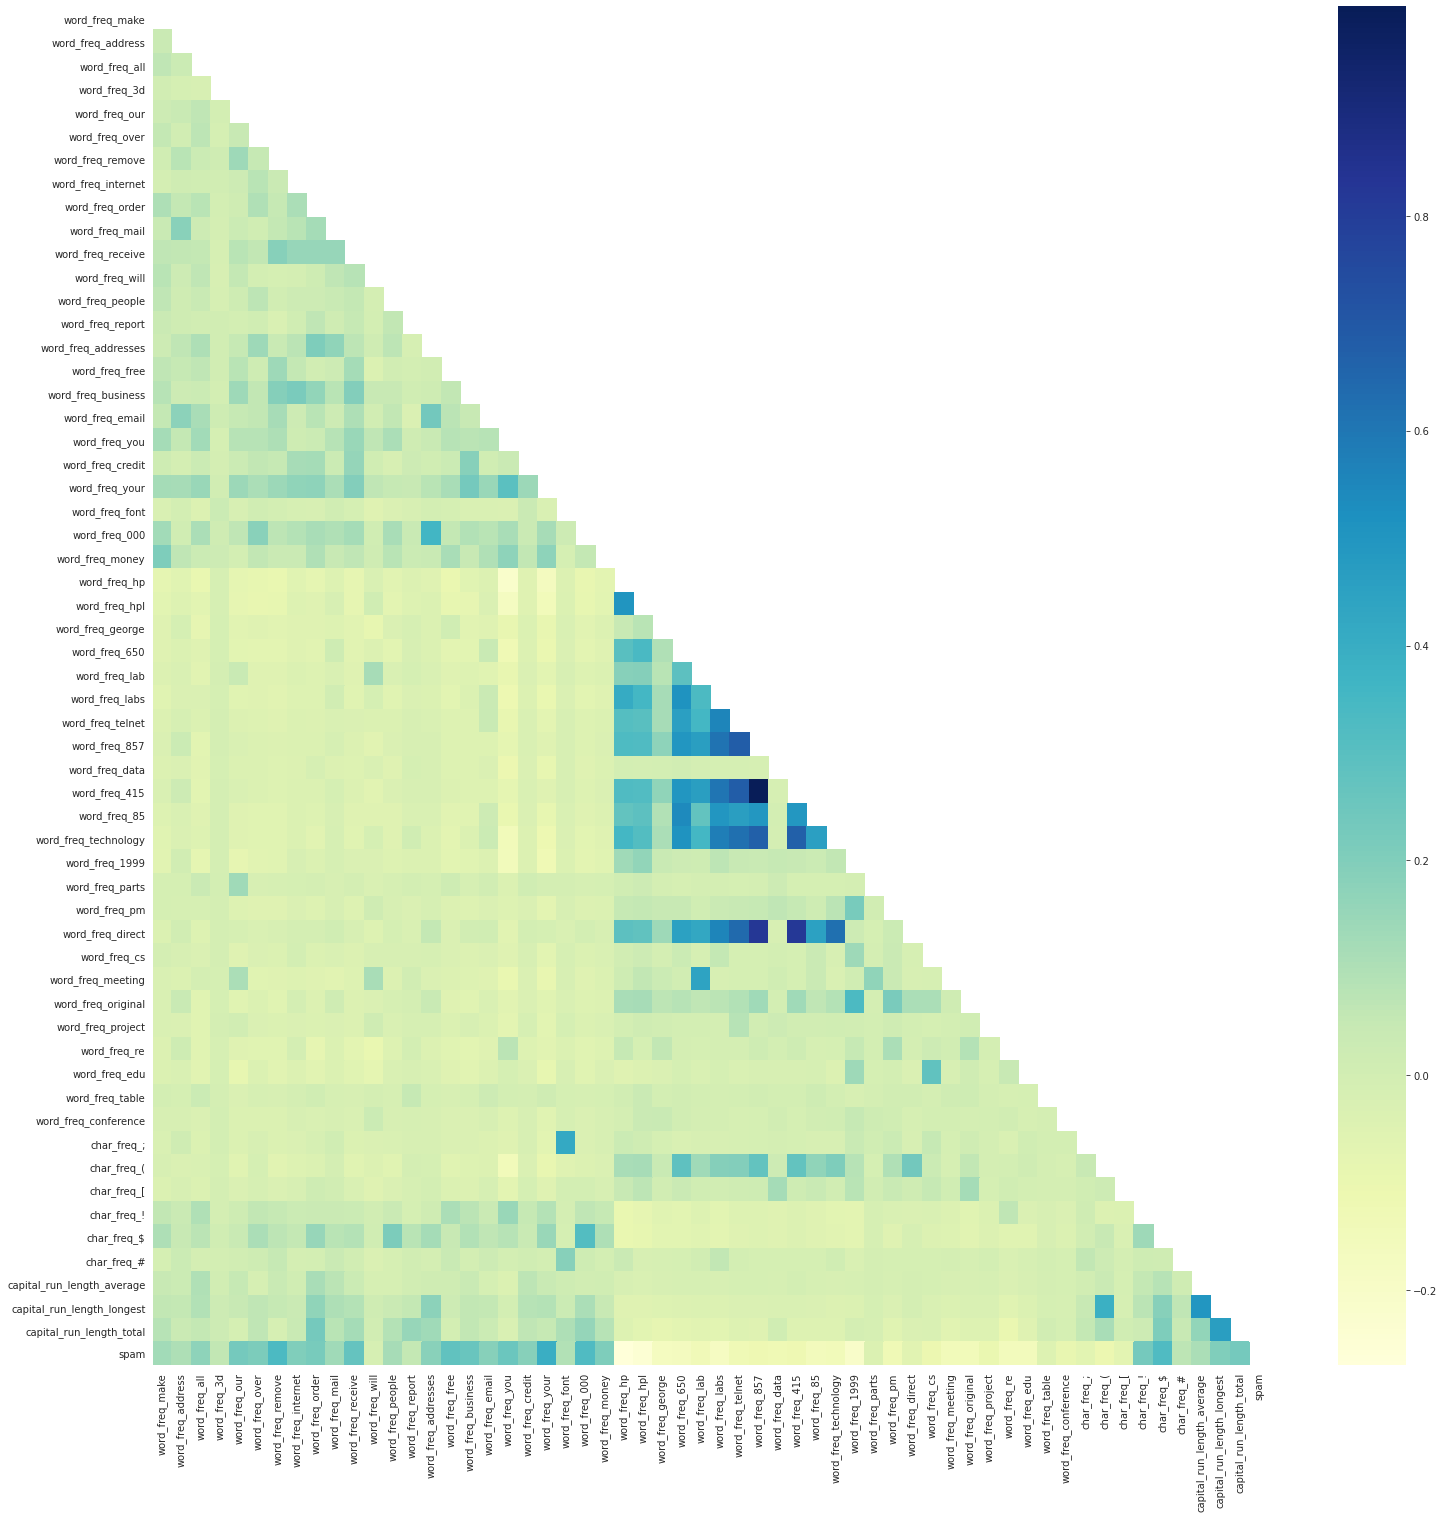

In [32]:
import seaborn as sns
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(25,25))
    ax = sns.heatmap(df.corr(),
mask=mask,annot=False,linecolor='black',cmap="YlGnBu",)

insight:
there are a few features with relatively high correlations 

In [48]:
# checking on the highly correlated features
correlation_matrix = df.corr()
correlated_features=[]
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            colname = correlation_matrix.columns[i]
            correlated_features.append(colname)

print("HIGHLY CORRELATED FEATURES ARE\n",correlated_features)

HIGHLY CORRELATED FEATURES ARE ['word_freq_415', 'word_freq_direct', 'word_freq_direct']


testing for multicolinearity

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
   
# the independent variables set
X = df.iloc[:,:-1]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                       feature         VIF
0               word_freq_make    1.229407
1            word_freq_address    1.173538
2                word_freq_all    1.400882
3                 word_freq_3d    1.006264
4                word_freq_our    1.324950
5               word_freq_over    1.192613
6             word_freq_remove    1.215999
7           word_freq_internet    1.173639
8              word_freq_order    1.314221
9               word_freq_mail    1.275207
10           word_freq_receive    1.293204
11              word_freq_will    1.452327
12            word_freq_people    1.179703
13            word_freq_report    1.078906
14         word_freq_addresses    1.391345
15              word_freq_free    1.174359
16          word_freq_business    1.332468
17             word_freq_email    1.326938
18               word_freq_you    2.108006
19            word_freq_credit    1.115386
20              word_freq_your    1.924680
21              word_freq_font    1.311079
22         

 word_freq_857 and word_freq_415 are  highly collinear with the other explanatory variables, and the parameter estimates will have large standard errors because of them.

In [51]:
# dropping the redundant columns
df.drop(['word_freq_415', 'word_freq_857'],axis=1,inplace=True)

feature selection

In [53]:
# data reduction

# Separating our target label (type) from the other features
feat = df.iloc[:,:-1]
spam_label = df.iloc[:,-1]
# Subject our features to LDA model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# Create an instance of LDA
lda = LDA()
lda = lda.fit(feat, spam_label)
lda_feat = lda.transform(feat)
#lda coefficients
lda.coef_
# Since the coefficients are in an array, we need to create a dataframe so that we can extract the name of the columns
f_imp = pd.DataFrame(index=feat.columns.values, data=lda.coef_[0].T)
f_imp.sort_values(0, ascending=False)

,0
char_freq_$,2.376093
word_freq_remove,1.967756
word_freq_000,1.554823
word_freq_receive,1.343132
word_freq_over,1.076594
word_freq_internet,0.804692
word_freq_free,0.789185
word_freq_our,0.746832
word_freq_direct,0.721612
word_freq_money,0.692590


features that best classify the label 'spam' are:
* char_freq_$
* word_freq_remove
* word_freq_000
* word_freq_receive
* word_freq_over


#  Implementing the Solution

 Using the above features to create a naive bayes model

In [116]:
# splitting to features and labels
X =  df[['char_freq_$','word_freq_remove','word_freq_000','word_freq_receive','word_freq_over']].values
y =  df['spam'].values

Normalizing our data because the features are not normally distributed


In [117]:
#Normalizing ourdata

from sklearn.preprocessing import Normalizer
# Create normalizer
normalizer = Normalizer(norm='l2')

# Transform feature matrix
normalizer.fit_transform(X)

array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.29051158, 0.33893018, 0.69399989, 0.33893018, 0.4519069 ],
       [0.14564439, 0.15039366, 0.91819289, 0.30078733, 0.15039366],
       ...,
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ]])

Training the model with 80% training and 20% test data

In [78]:
# splitting to train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=0)

In [79]:
# Training our model
# 
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()  
model = clf.fit(X_train, y_train) 

In [80]:
import numpy as np

# Predicting our test predictors
predicted = model.predict(X_test)

In [81]:
# checking on accuracy and performance of the model
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,predicted))
print(classification_report(y_test,predicted))

[[469  26]
 [138 209]]
              precision    recall  f1-score   support

           0       0.77      0.95      0.85       495
           1       0.89      0.60      0.72       347

    accuracy                           0.81       842
   macro avg       0.83      0.77      0.78       842
weighted avg       0.82      0.81      0.80       842



Training the model with 70% training and 30% test data

In [82]:
# splitting to train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=0)
model = clf.fit(X_train, y_train) 

In [83]:
# Predicting our test predictors
predicted = model.predict(X_test)

In [84]:
# checking on accuracy and performance of the model
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,predicted))
print(classification_report(y_test,predicted))

[[703  34]
 [199 327]]
              precision    recall  f1-score   support

           0       0.78      0.95      0.86       737
           1       0.91      0.62      0.74       526

    accuracy                           0.82      1263
   macro avg       0.84      0.79      0.80      1263
weighted avg       0.83      0.82      0.81      1263



Training the model with 60% training and 40% test data

In [118]:
# splitting to train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .4, random_state=0)
model = clf.fit(X_train, y_train) 

In [119]:
# Predicting our test predictors
predicted = model.predict(X_test)

In [120]:
# checking on accuracy and performance of the model
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,predicted))
print(classification_report(y_test,predicted))

[[943  51]
 [252 438]]
              precision    recall  f1-score   support

           0       0.79      0.95      0.86       994
           1       0.90      0.63      0.74       690

    accuracy                           0.82      1684
   macro avg       0.84      0.79      0.80      1684
weighted avg       0.83      0.82      0.81      1684



Improving the naive bayes model


To do this, 
* will try to find the best variable smoothing parameter


In [121]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

from sklearn.model_selection import GridSearchCV

nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, cv=10, n_jobs=-1)
nbModel_grid.fit(X_train, y_train)

print(nbModel_grid.best_estimator_)


GaussianNB(priors=None, var_smoothing=0.0004328761281083057)


In [122]:
clf = GaussianNB(priors=None, var_smoothing=0.0004328761281083057)
model = clf.fit(X_train, y_train) 
# Predicting our test predictors
predicted = model.predict(X_test)

In [123]:
# checking on accuracy and performance of the model
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,predicted))
print(classification_report(y_test,predicted))

[[943  51]
 [253 437]]
              precision    recall  f1-score   support

           0       0.79      0.95      0.86       994
           1       0.90      0.63      0.74       690

    accuracy                           0.82      1684
   macro avg       0.84      0.79      0.80      1684
weighted avg       0.83      0.82      0.81      1684



# Challenging the solution

* Trying out other types of classification models to check the performance of the model
* Adding more features to the model to challenge the findings, to see if we'll get a higher accuracy. note the features follow the order from the LDA feature importance list


Adding more features with 40% test data

In [100]:
# splitting to features and label sets
X =  df[['char_freq_$','word_freq_remove','word_freq_000','word_freq_receive','word_freq_over',
         'word_freq_internet','word_freq_free','word_freq_our','word_freq_direct','word_freq_money']].values
y =  df['spam'].values

In [101]:
#Normalizing ourdata

from sklearn.preprocessing import Normalizer
# Create normalizer
normalizer = Normalizer(norm='l2')

# Transform feature matrix
normalizer.fit_transform(X)

array([[0.        , 0.        , 0.        , ..., 0.70710678, 0.        ,
        0.        ],
       [0.2299205 , 0.26824058, 0.54925453, ..., 0.17882706, 0.        ,
        0.54925453],
       [0.10393397, 0.10732312, 0.6552359 , ..., 0.694776  , 0.03389151,
        0.03389151],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [102]:
# splitting to train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .4, random_state=0)

In [103]:
# Training our model
# 
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()  
model = clf.fit(X_train, y_train) 

In [104]:
# Predicting our test predictors
predicted = model.predict(X_test)

In [105]:
# checking on accuracy and performance of the model
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,predicted))
print(classification_report(y_test,predicted))

[[930  64]
 [198 492]]
              precision    recall  f1-score   support

           0       0.82      0.94      0.88       994
           1       0.88      0.71      0.79       690

    accuracy                           0.84      1684
   macro avg       0.85      0.82      0.83      1684
weighted avg       0.85      0.84      0.84      1684



Using other classification models
 

1.   logistic regression




In [106]:
from sklearn.linear_model import LogisticRegression

# Fitting our model
# 
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [108]:
# Using our model to make a prediction
#
y_pred = LogReg.predict(X_test)

In [109]:
# checking on accuracy and performance of the model

print(confusion_matrix(y_test,predicted))
print(classification_report(y_test,y_pred))

[[930  64]
 [198 492]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       994
           1       0.90      0.76      0.82       690

    accuracy                           0.87      1684
   macro avg       0.87      0.85      0.86      1684
weighted avg       0.87      0.87      0.86      1684



2.   Random Forest Classifier

In [111]:
# Import the model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


forest = RandomForestClassifier(n_estimators= 200 ,random_state=0)


parameters={'min_samples_split': np.linspace(0.1, 1.0, 10, endpoint=True),
            'max_depth' : np.arange(1, 32, 4)}

forest_grid = GridSearchCV(estimator=forest,param_grid=parameters,n_jobs=-1,refit=True,cv=10 )

forest_grid = forest_grid.fit(X_train, y_train)

print("Random forest best parameters:", forest_grid.best_params_)


Random forest best parameters: {'max_depth': 5, 'min_samples_split': 0.1}


In [114]:
# Predict based on the model we've trained
y_pred_rforest = forest_grid.predict(X_test)

print(confusion_matrix(y_test,y_pred_rforest)) 

from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("\nAccuracy:",metrics.accuracy_score(y_test, y_pred_rforest))

[[893 101]
 [100 590]]

Accuracy: 0.8806413301662708


# Conclusions

* training the model at 60% and at 70% gave a higher accuracy score than on 80%  at 82% accuracy
* when challenging the solution, adding more features to the model did indeed increase the accuracy score to 84% accuracy
* furthermore, tesing using other models gave an even higher score as a logistic regression gave an accuracy score of 87% and a randomforest classifier had a score of 88%
